In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 1.逻辑回归模型

对于二分类问题，我们需要预测的是样本属于正例的概率，但是若以线性函数建模，即：
$$h(x)=\sum_{i=0}^{d} \theta_{i} x_{i}$$
此时$h(x) \in \mathbb{R} $，不能解释为概率。

为了将模型结果解释为概率，最简单的方法就是将$\sum_{i=0}^{d} \theta_{i} x_{i}$从$\mathbb{R}$映射到$[0,1]$之间，即：
$$h(x)=g(\sum_{i=0}^{d} \theta_{i} x_{i})$$
其中$g:\mathbb{R} \to [0,1]$

若令$g(x) = \sigma = \frac{1}{1+e^{-x}}$，就得到了逻辑回归模型：

$$h_{\theta}(x) = \sigma(\theta^{T}x) = \frac{1}{1+e^{-\theta^{T}x}} $$

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

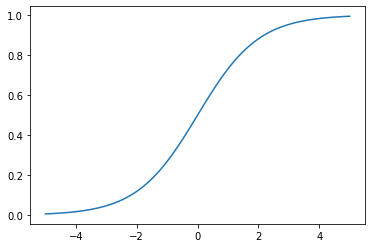

In [7]:
plt.plot(np.linspace(-5, 5, 100), 1 / (1 + np.exp(-np.linspace(-5, 5, 100))))
plt.show()

# 2.交叉熵

假设我们预测某样本为正例的概率是$p$<br>
若真实为正例，设此样本的损失为$l(p)$，我们应有：
$$\lim_{x \to 0} l(x) = \infty，\lim_{x \to 1 } l(x) = 0 $$
若真实为负例，根据对称原则，其损失为$l(1 - p)$<br>

对于逻辑回归，我们选择$l=-log$：

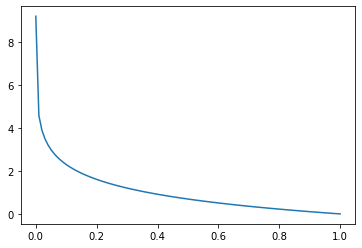

In [8]:
plt.plot(np.linspace(1e-4, 1, 100), -np.log(np.linspace(1e-4, 1, 100)))
plt.show()

则逻辑回归的损失函数可以写为：
$$l(p,y) = -log(p)*y - log(1 - p)*(1 - y)$$
目标函数为：
$$J(\theta) = \sum_{i=1}^{n}-log(\sigma(\theta^{T}x^{(i)}))*y^{(i)} - log(1 - \sigma(\theta^{T}x^{(i)})) * (1 - y^{(i)})$$
写成矩阵形式就是：
$$J(\theta) = -y^{T}log(\sigma(\theta^{T}X)) - (1 - y)^{T}log(1 - \sigma(\theta^{T}X))$$

# 3.逻辑回归的梯度下降公式

$$
\begin{equation}
\begin{split}
\frac{\partial }{\partial \theta_{j}}J(\theta ) &= \frac{\partial }{\partial \theta_{j}}\sum_{i=1}^{n}-log(\sigma(\theta^{T}x^{(i)}))*y^{(i)} - log(1 - \sigma(\theta^{T}x^{(i)})) * (1 - y^{(i)}) \\
&= \sum_{i=1}^{n}(-y^{(i)}\frac{1}{\sigma(\theta^{T}x^{(i)})} + (1 - y^{(i)})\frac{1}{1 - \sigma(\theta^{T}x^{(i)})})\frac{\partial }{\partial \theta_{j}}\sigma(\theta^{T}x^{(i)})\\
&=\sum_{i=1}^{n}(-y^{(i)}\frac{1}{\sigma(\theta^{T}x^{(i)})} + (1 - y^{(i)})\frac{1}{1 - \sigma(\theta^{T}x^{(i)})})\sigma(\theta^{T}x^{(i)})(1-\sigma(\theta^{T}x^{(i)}))\frac{\partial }{\partial \theta_{j}}\theta^{T}x^{(i)} \\
\end{split}
\end{equation}
$$

写成矩阵形式就是：
$$
\frac{\partial }{\partial \theta}J(\theta ) = X^{T}(\sigma(X\theta) -y)
$$
梯度下降的公式：
$$
\theta: =\theta - \alpha X^{T}(\sigma(X\theta)-\mathbf{y} )
$$

In [9]:
def logistic_gradient_descent(x, y, learning_rate, iter_times):
    """
    x's shape: (num_samples, dimension)
    y's shape: (num_samples, 1)
    参数theta初始化为0
    返回经过iter_times轮学习率为learning_rate的梯度下降后的参数theta
    """
    dim = x.shape[1]
    theta = np.zeros((dim, 1))
    for i in range(iter_times):
        gradient = np.dot(x.transpose(), sigmoid(np.dot(x, theta)) - y)
        theta -= learning_rate * gradient
    return theta

# 4.regularization

为了避免参数绝对值过大，可为逻辑回归加上正则，即在目标函数上加上惩罚函数

l2正则：
$$J(\theta) += \lambda \left \| \theta \right \|_{2} $$

l1正则：
$$J(\theta) += \lambda \left \| \theta \right \|_{1} $$

相应的梯度下降公式也会改变

# 5.softmax

对于多分类问题，我们需要预测一个概率分布$(p_{1}, ...,p_{k})$